## Coursework 1 - Decision Trees
Shaanuka, Shaheen, Omar, Indraneel

### File Imports

In [47]:
from src.treegen import *
from src.prune import *
from src.evaluation import *

### Loading a Specified Dataset
The default is the clean dataset.

In [49]:
#File paths
clean_filepath = "test/clean_dataset.txt"
noisy_filepath = "test/noisy_dataset.txt"
#Load training set from file
data = np.loadtxt(clean_filepath, dtype=float)

### Splitting Dataset and Initialising Performance Metrics for Evaluation

In [50]:
#Shuffle the dataset
np.random.shuffle(data)
#Split into three sets for cross validation
test_set, training_set, validation_set = cross_val(data)
#Initialise all metrics to 0
accuracy, precision, recall, f1 = 0,{1:0,2:0,3:0,4:0},{1:0,2:0,3:0,4:0},{1:0,2:0,3:0,4:0}
pruned_accuracy, pruned_precision, pruned_recall, pruned_f1 = 0,{1:0,2:0,3:0,4:0},{1:0,2:0,3:0,4:0},{1:0,2:0,3:0,4:0}
confusion_matrix = [[0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0]]
confusion_matrix_pruned = [[0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0]]
runningDepth, runningPrunedDepth = 0, 0

### Running 10-Fold Cross Validation Using the Above Dataset
Pictures of the 10 trees before and after pruning are in the 'trees' subfolder. The first tree is shown in the notebook itself.

Generating Tree: 1 

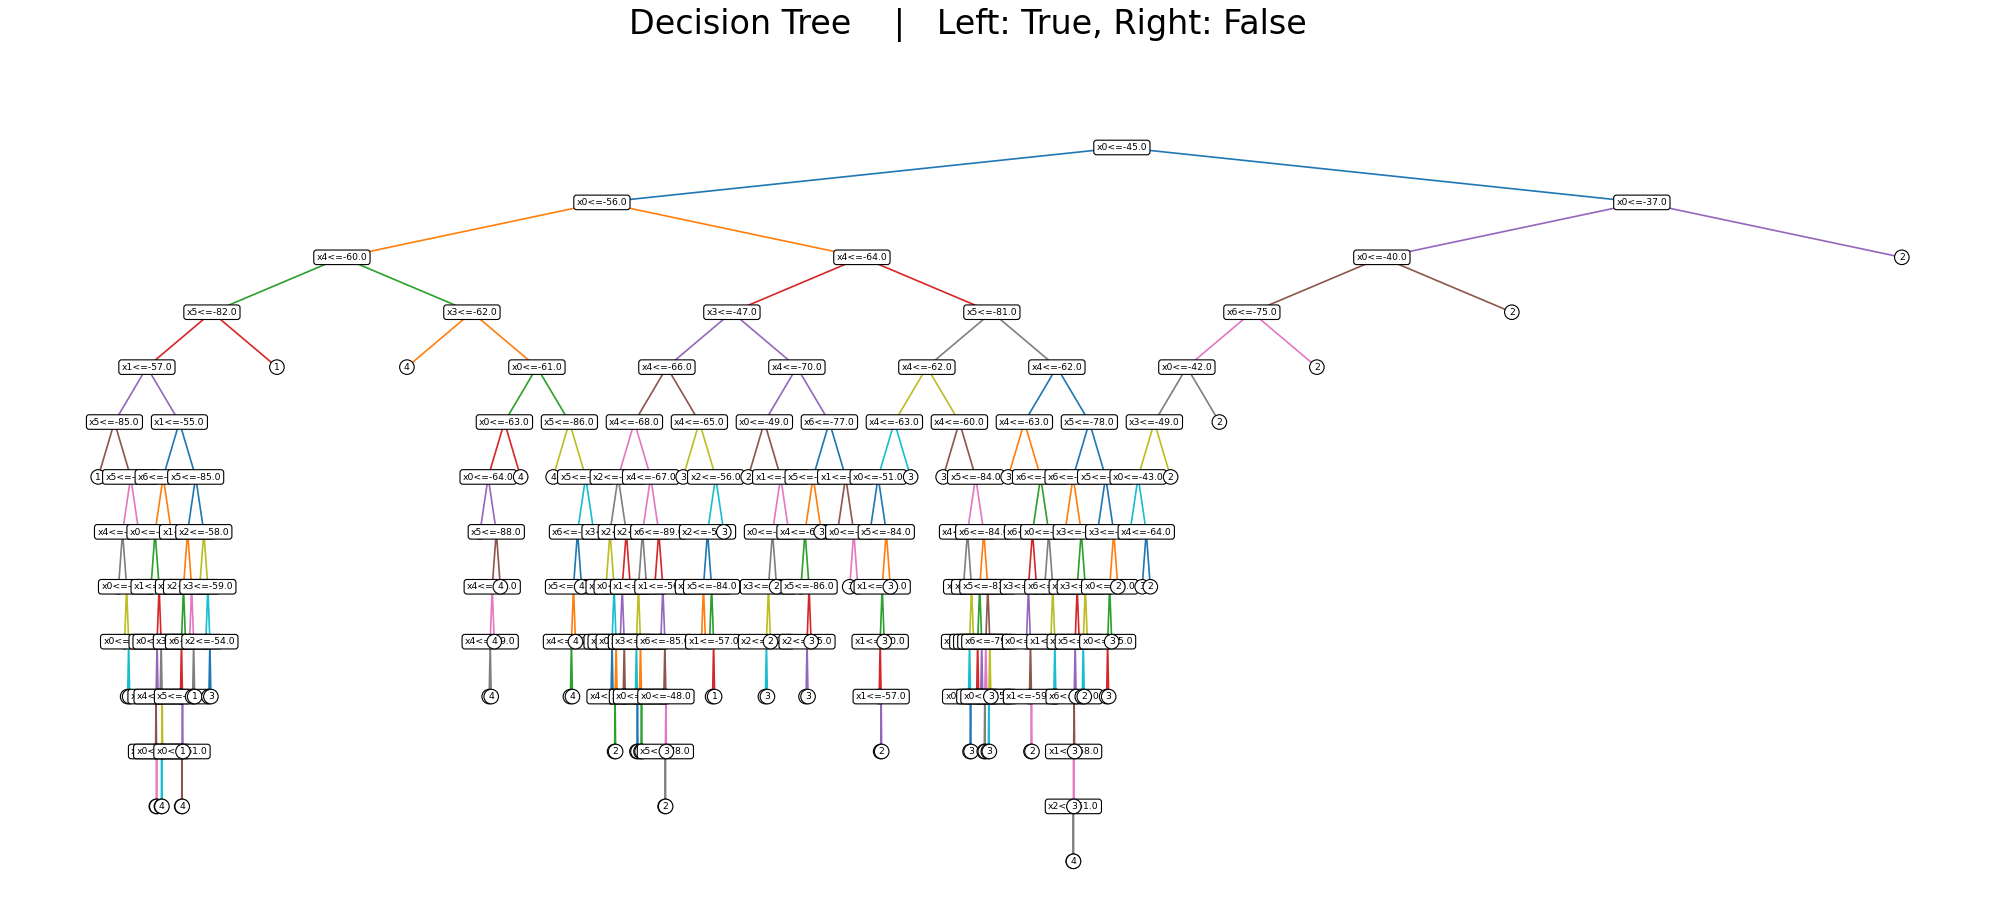

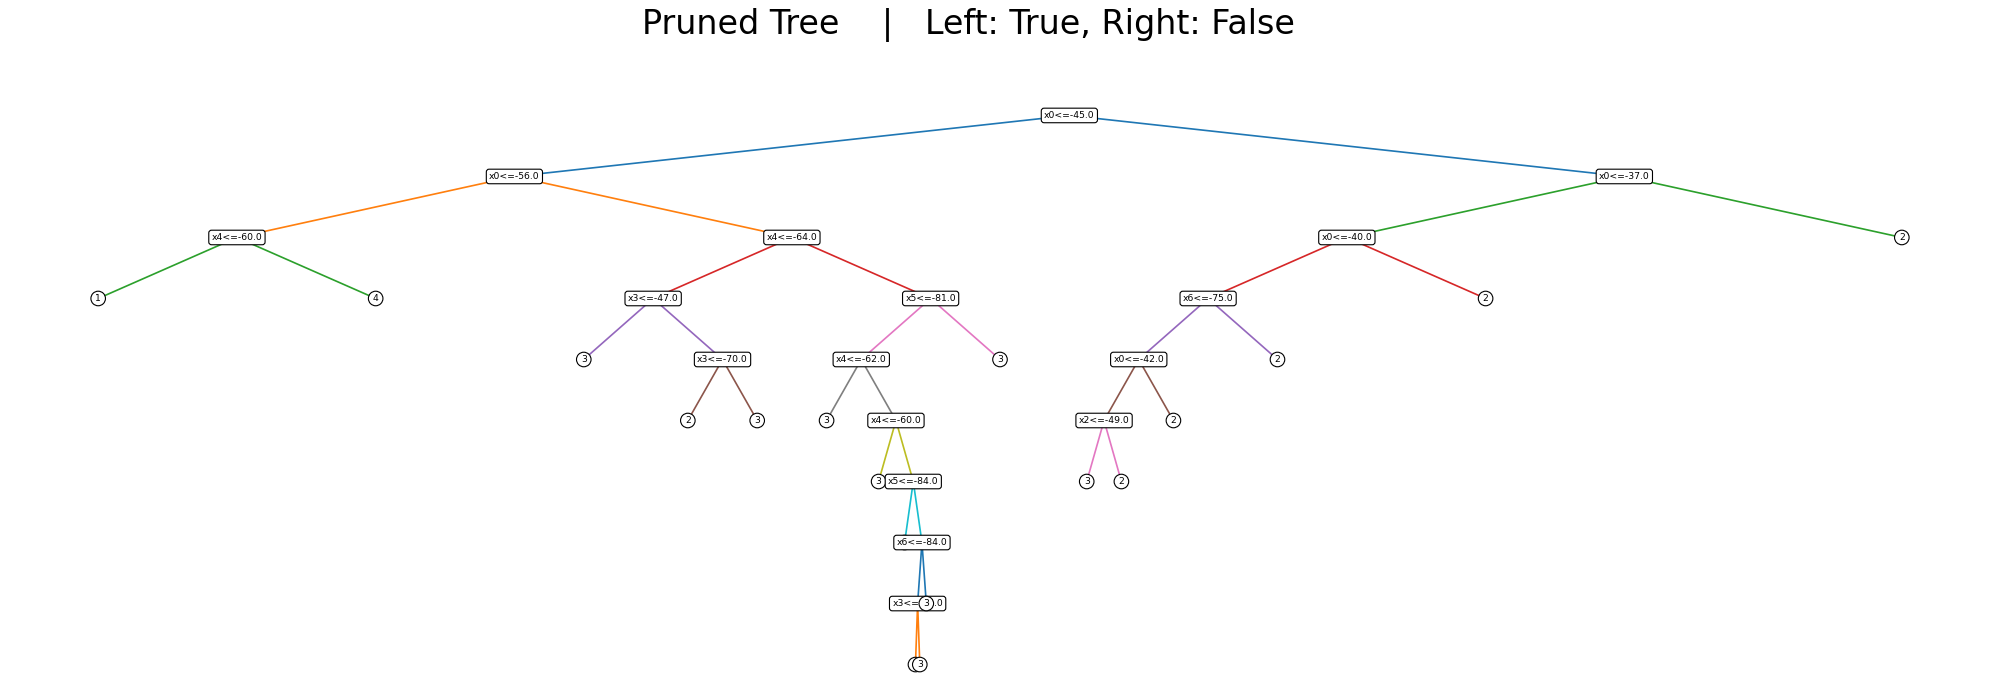

Pre-pruned depth: 13 depth after pruning: 10
Generating Tree: 2 Pre-pruned depth: 14 depth after pruning: 8
Generating Tree: 3 Pre-pruned depth: 14 depth after pruning: 10
Generating Tree: 4 Pre-pruned depth: 13 depth after pruning: 12
Generating Tree: 5 Pre-pruned depth: 13 depth after pruning: 9
Generating Tree: 6 Pre-pruned depth: 13 depth after pruning: 12
Generating Tree: 7 Pre-pruned depth: 14 depth after pruning: 10
Generating Tree: 8 Pre-pruned depth: 14 depth after pruning: 7
Generating Tree: 9 Pre-pruned depth: 13 depth after pruning: 10
Generating Tree: 10 Pre-pruned depth: 13 depth after pruning: 10

PRE-PRUNE:
 Accuracy: 0.958 
 Precision: {1: 0, 2: 0, 3: 0, 4: 0} 
 Recall: {1: 0, 2: 0, 3: 0, 4: 0}
 F1: {1: 0, 2: 0, 3: 0, 4: 0} 

POST-PRUNE:
 Accuracy: 0.9484999999999999 
 Precision: {1: 0, 2: 0, 3: 0, 4: 0} 
 Recall: {1: 0, 2: 0, 3: 0, 4: 0}
 F1: {1: 0, 2: 0, 3: 0, 4: 0}

Confusion Matrix:
[49.5, 0, 0.5, 0]
[0, 47.6, 2.4, 0]
[1.0, 2.4, 45.7, 9]
[3, 0, 9, 488] 

Pruned Con

In [51]:
k = 10
for i in range(k):
    print("Generating Tree:", i+1, end=' ')
    initNode = treeGen(training_set[i])
    root, depth = initNode.generateTree()
    runningDepth += depth
    root.visualizeTree(depth, f"src/trees/tree_diagram{i}.png","Decision Tree", i==0)
    confusion_matrix,accuracy,precision,recall,f1 = calc_avg_metrics(root,test_set[i],accuracy,precision,recall,f1,confusion_matrix, k)
    tree = pruning(root,root,validation_set[i])
    pruned_depth = calculate_depth(tree)
    runningPrunedDepth += pruned_depth
    confusion_matrix_pruned,pruned_accuracy,pruned_precision,pruned_recall,pruned_f1 = calc_avg_metrics(tree, test_set[i],pruned_accuracy,pruned_precision,pruned_recall,pruned_f1,confusion_matrix_pruned, k)
    tree.visualizeTree(pruned_depth, f"src/trees/tree_pruned{i}.png","Pruned Tree", i==0)
    print("Pre-pruned depth:", depth, "depth after pruning:", pruned_depth)
accuracy/=k
pruned_accuracy/=k
precision,recall,f1,confusion_matrix = normalise(precision,recall,f1,confusion_matrix, k)
pruned_precision,pruned_recall,pruned_f1,confusion_matrix_pruned = normalise(pruned_precision,pruned_recall,pruned_f1,confusion_matrix_pruned, k)
print(f"\nPRE-PRUNE:\n Accuracy: {accuracy} \n Precision: {precision} \n Recall: {recall}\n F1: {f1} \n")
print(f"POST-PRUNE:\n Accuracy: {pruned_accuracy} \n Precision: {pruned_precision} \n Recall: {pruned_recall}\n F1: {pruned_f1}")
print("\nConfusion Matrix:\n" + "\n".join(str(i) for i in confusion_matrix),"\n\nPruned Confusion Matrix:\n" + "\n".join(str(i) for i in confusion_matrix_pruned))
print(f"\nAverage tree depth: {runningDepth/k}, Average pruned depth: {runningPrunedDepth/k}")

### Evaluating Custom Inputs on the Pruned Tree
Enter a datapoint formatted as "-65 -59 -61 -67 -72 -86 -81". 
Enter 'e' to exit.

In [52]:
datapoint = input("Enter a datapoint: ")
while datapoint != 'e':
    formattedData = [int(i) for i in datapoint.split()]
    print("Pruned tree output:", eval_tree(tree, formattedData))
    datapoint = input("Enter a datapoint: ")

Pruned tree output: 1
Pruned tree output: 1
